In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from datetime import datetime
import seaborn as sns
import pandas as pd

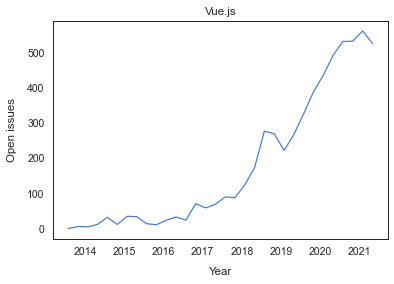

In [2]:
dt = []
repo = "vue"
with open(f'../../data/final/{repo}.json') as json_file:                
    name = repo            
    data = json.load(json_file)

    dt += [{"date": datetime.strptime(d["date"], '%Y-%m-%d'), "stars": d["open_issues"], "project": name} for d in data]



sns.set_theme(context="paper", palette="muted", style="white", font='sans-serif', font_scale=1.2)
df = pd.DataFrame(data={'dates': [record["date"] for record in dt], 'stars': [record["stars"] for record in dt], 'projects': [record["project"] for record in dt]})

g = sns.lineplot(data=df, x="dates", y="stars")
g.set_title("Vue.js")
g.set_xlabel("Year")
g.set_ylabel("Open issues")
g.xaxis.labelpad = 10
g.yaxis.labelpad = 10

fig = g.get_figure()
fig.savefig(f'../../figures/metrics/independent/{repo}/open_issues.pdf', format='pdf', bbox_inches="tight")